## Load data and plot cases

In [153]:
# load the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from neuralprophet import NeuralProphet

In [154]:
# src: https://npgeo-corona-npgeo-de.hub.arcgis.com/datasets/dd4580c810204019a7b8eb3e0b329dd6_0
df = pd.read_csv("data/RKI.csv",usecols=["Meldedatum","AnzahlFall"])

In [155]:
df.tail()

,AnzahlFall,Meldedatum
1186826,3,2021/01/31 00:00:00+00
1186827,1,2021/02/01 00:00:00+00
1186828,1,2021/02/02 00:00:00+00
1186829,5,2021/02/02 00:00:00+00
1186830,2,2021/02/03 00:00:00+00


In [156]:
df.dtypes

AnzahlFall     int64
Meldedatum    object
dtype: object

In [157]:
df["Meldedatum"] = df["Meldedatum"].str.extract(r'^(\d\d\d\d\/\d\d\/\d\d).*$')
df["Meldedatum"] = pd.to_datetime(df["Meldedatum"],format='%Y/%m/%d',errors='coerce')

In [158]:
df = df.rename(columns={"Meldedatum": "ds", "AnzahlFall": "y"})

In [159]:
df.tail()

,y,ds
1186826,3,2021-01-31
1186827,1,2021-02-01
1186828,1,2021-02-02
1186829,5,2021-02-02
1186830,2,2021-02-03


In [160]:
df.dtypes

y              int64
ds    datetime64[ns]
dtype: object

<AxesSubplot:xlabel='ds'>

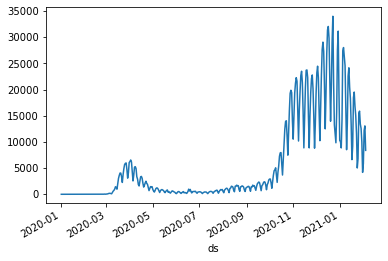

In [169]:
df.groupby(["ds"]).y.sum().plot()

In [161]:
m = NeuralProphet()
train_metrics = m.fit(df_train, freq="D")

INFO: nprophet.utils - set_auto_seasonalities: Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO: nprophet.utils - set_auto_seasonalities: Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 128
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 5


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 6.58E-01
Epoch[5/5]: 100%|██████████| 5/5 [01:18<00:00, 15.68s/it, SmoothL1Loss=0.0473, MAE=1.2, RegLoss=0] 


In [162]:
val_metrics = m.test(df_val)

INFO: nprophet - _evaluate: Validation metrics:    SmoothL1Loss    MAE
1         0.043  1.437


In [163]:
future = m.make_future_dataframe(df, periods=30)
forecast = m.predict(future)

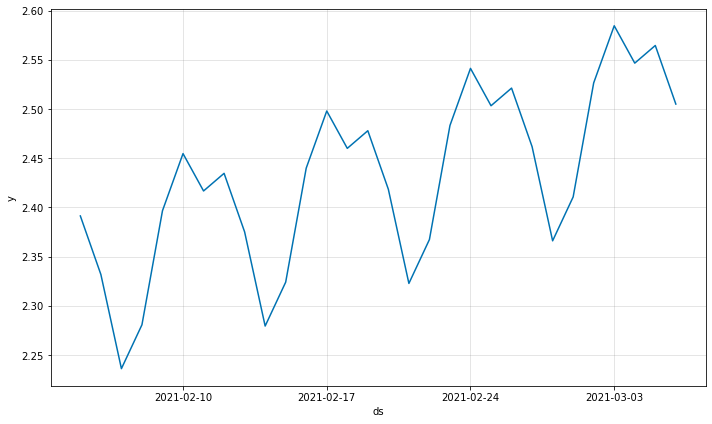

In [164]:
forecasts_plot = m.plot(forecast)

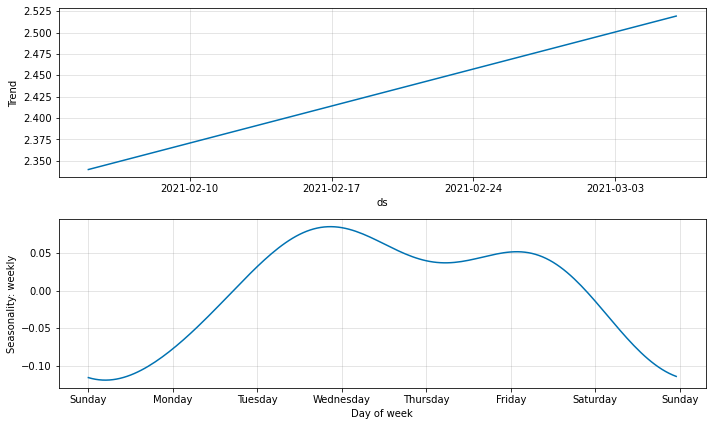

In [165]:
fig_comp = m.plot_components(forecast)

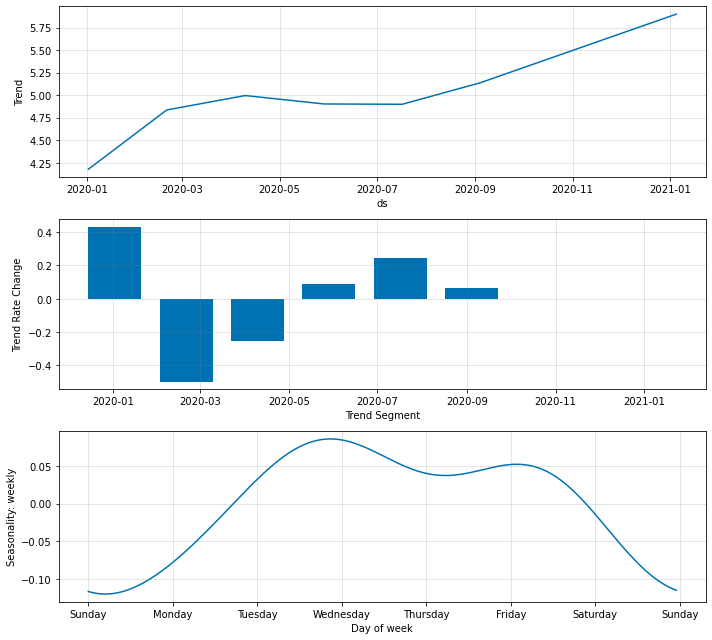

In [166]:
fig_param = m.plot_parameters()